## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
# View the dataframe
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merged_data.head()

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
merged_data["Mouse ID"].unique()
x = len(merged_data["Mouse ID"].unique())
print(f"The total number of mice is {x}")

The total number of mice is 249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]["Mouse ID"].unique()


array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = ['g989']

clean_df = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_id)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].unique()
y = len(clean_df["Mouse ID"].unique())
print(f"The total number of mice in the clean DataFrame is {y}")

The total number of mice in the clean DataFrame is 248


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_stdev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#tumor_volume_sem

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df = pd.DataFrame({"Tumor_Vol Mean": tumor_volume_mean,"Tumor_Vol Median": tumor_volume_median, 
                                 "Tumor_Vol Variance": tumor_volume_var, "Tumor_Vol StDev": tumor_volume_stdev,
                                 "Tumor_Vol SEM": tumor_volume_sem}).round(3)
                                 

summary_df


,Tumor_Vol Mean,Tumor_Vol Median,Tumor_Vol Variance,Tumor_Vol StDev,Tumor_Vol SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_groupby_df= clean_df.groupby('Drug Regimen').agg(\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        Tumor_Vol_Variance=('Tumor Volume (mm3)', np.var),\
        Tumor_Vol_StDev=('Tumor Volume (mm3)', np.std),\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)).round(3)

summary_groupby_df

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Variance,Tumor_Vol_StDev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

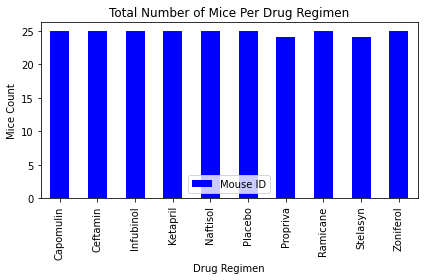

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Drugs list dataframe
drugs_list = clean_df.groupby("Drug Regimen")
# Drugs count dataframe
drugs_list_count = pd.DataFrame(drugs_list["Mouse ID"].nunique())   
# Create bar chart
bar_chart = drugs_list_count.plot(kind='bar', title="Total Number of Mice Per Drug Regimen", color="b")
# Set the xlabel and ylabel 
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Mice Count")
plt.tight_layout()

plt.show()


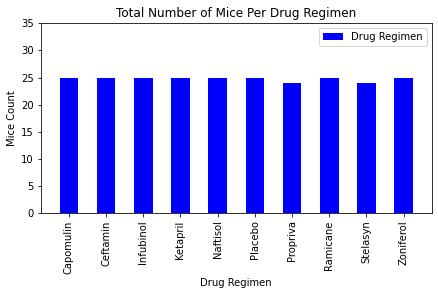

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Using the same groupby dataframe above
# Set x axis and tick locations
x_axis = np.arange(len(drugs_list_count))
tick_locations = [value for value in x_axis]

# Create the bar chart
plt.figure(figsize=(7,3.5))
plt.bar(x_axis, drugs_list_count["Mouse ID"], color='blue', align="center", width = 0.5)
plt.xticks(tick_locations, list(drugs_list_count.index), rotation="vertical")

# Set the limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drugs_list_count["Mouse ID"])*1.4)

# Set title and labels
plt.title("Total Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

bars_name = ["Drug Regimen"]
plt.legend(bars_name,loc="best")

plt.show()


In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Grouping by the 'Sex' column and count
gender_type = clean_df.groupby("Sex")
gender_type_count = pd.DataFrame(gender_type["Mouse ID"].nunique())

gender_type_count.head()

,Mouse ID
Sex,
Female,123
Male,125


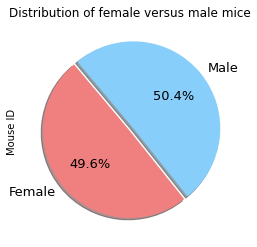

In [16]:
plot = gender_type_count.plot.pie(y= "Mouse ID", title="Distribution of female versus male mice", legend=False, \
                   autopct='%1.1f%%', colors =["lightcoral", "lightskyblue"] ,explode=(0, 0.05), \
                   shadow=True, startangle=130, fontsize=13)
plot

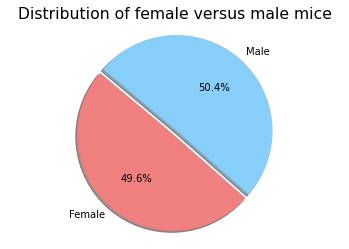

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_type_count.index.values)
gender_counts = gender_type_count["Mouse ID"]

# Style specification
colors = ["lightcoral", "lightskyblue"]
explode = (0.05, 0)

# Generate pie chart using the values above
plt.pie(gender_counts, labels=genders, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 13
plt.title("Distribution of female versus male mice")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = clean_df.groupby("Mouse ID").max()["Timepoint"]
timepoint_max_df = pd.DataFrame(timepoint_max)
timepoint_max_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_max_merge = pd.merge(timepoint_max_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
timepoint_max_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Capomulin_df = timepoint_max_merge.loc[timepoint_max_merge["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(Capomulin_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = Capomulin_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(lower_bound)  

20.70456164999999
17.912664470000003
36.83290494999999
25.355449580000002


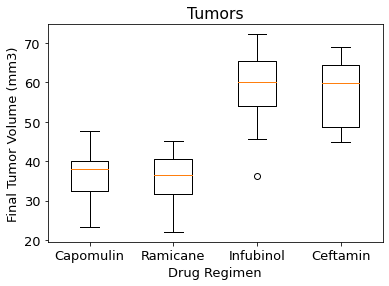

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = tumor_vol_data
fig1, ax1 = plt.subplots()
ax1.set_title("Tumors")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

## Line and Scatter Plots

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "m957",:]
line_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,m957,Capomulin,Female,3,19,0,45.000000,0
136,m957,Capomulin,Female,3,19,5,45.622381,1
137,m957,Capomulin,Female,3,19,10,46.414518,1
138,m957,Capomulin,Female,3,19,15,39.804453,1
139,m957,Capomulin,Female,3,19,20,38.909349,1
140,m957,Capomulin,Female,3,19,25,37.695432,1
141,m957,Capomulin,Female,3,19,30,38.212479,1
142,m957,Capomulin,Female,3,19,35,32.562839,1
143,m957,Capomulin,Female,3,19,40,32.947615,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


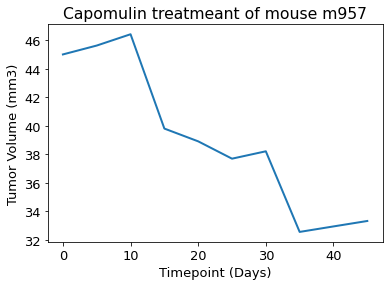

In [32]:
x_axisTP = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatmeant of mouse m957")
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

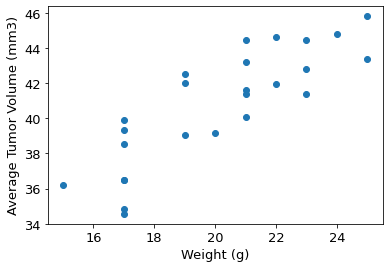

In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_regimen = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
avg = Capomulin_regimen.groupby(['Mouse ID']).mean()
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg['Weight (g)'],avg['Tumor Volume (mm3)'])[0],2)

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {corr}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


In [39]:
# linear regression model 
LR_model=st.linregress(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

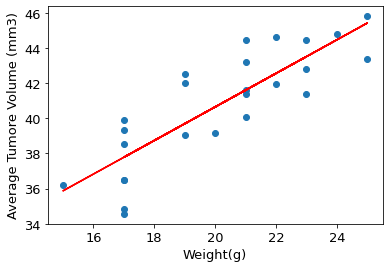

In [37]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

y_values = avg['Weight (g)']*mslope+bintercept
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
plt.plot(avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()